In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import random
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'
os.environ['PYTHONHASHSEED']='0'

In [2]:
x = np.linspace(0,10) 

In [3]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds()

In [4]:
y = x + np.random.standard_normal(len(x))

In [5]:
reg = np.polyfit(x,y,deg=1)

In [6]:
reg

array([0.94612934, 0.22855261])

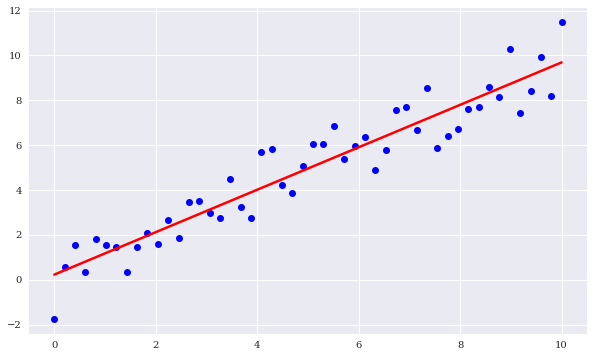

In [7]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'bo',label='data')
plt.plot(x,np.polyval(reg,x),'r',lw=2.5,label='linear regresion')

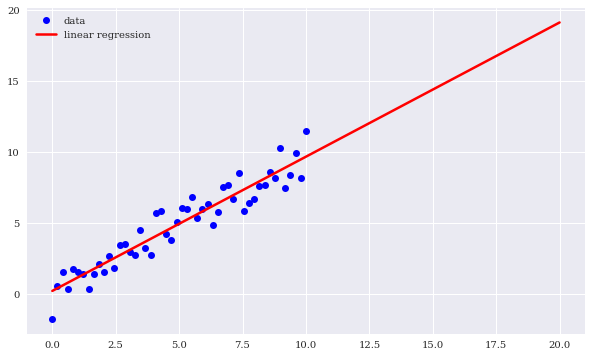

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)  
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5,label='linear regression')
plt.legend(loc=0);

In [9]:
lags = 3

In [10]:
m = np.zeros((lags + 1,len(x)-lags))

In [11]:
m[lags]=x[lags:]
for i in range(lags):
    m[i]=x[i:i - lags]

In [12]:
m.T

array([[ 0.        ,  0.20408163,  0.40816327,  0.6122449 ],
       [ 0.20408163,  0.40816327,  0.6122449 ,  0.81632653],
       [ 0.40816327,  0.6122449 ,  0.81632653,  1.02040816],
       [ 0.6122449 ,  0.81632653,  1.02040816,  1.2244898 ],
       [ 0.81632653,  1.02040816,  1.2244898 ,  1.42857143],
       [ 1.02040816,  1.2244898 ,  1.42857143,  1.63265306],
       [ 1.2244898 ,  1.42857143,  1.63265306,  1.83673469],
       [ 1.42857143,  1.63265306,  1.83673469,  2.04081633],
       [ 1.63265306,  1.83673469,  2.04081633,  2.24489796],
       [ 1.83673469,  2.04081633,  2.24489796,  2.44897959],
       [ 2.04081633,  2.24489796,  2.44897959,  2.65306122],
       [ 2.24489796,  2.44897959,  2.65306122,  2.85714286],
       [ 2.44897959,  2.65306122,  2.85714286,  3.06122449],
       [ 2.65306122,  2.85714286,  3.06122449,  3.26530612],
       [ 2.85714286,  3.06122449,  3.26530612,  3.46938776],
       [ 3.06122449,  3.26530612,  3.46938776,  3.67346939],
       [ 3.26530612,  3.

In [13]:
reg = np.linalg.lstsq(m[:lags].T,m[lags],rcond=None)[0]

In [14]:
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [15]:
np.dot(m[:lags].T,reg)

array([ 0.6122449 ,  0.81632653,  1.02040816,  1.2244898 ,  1.42857143,
        1.63265306,  1.83673469,  2.04081633,  2.24489796,  2.44897959,
        2.65306122,  2.85714286,  3.06122449,  3.26530612,  3.46938776,
        3.67346939,  3.87755102,  4.08163265,  4.28571429,  4.48979592,
        4.69387755,  4.89795918,  5.10204082,  5.30612245,  5.51020408,
        5.71428571,  5.91836735,  6.12244898,  6.32653061,  6.53061224,
        6.73469388,  6.93877551,  7.14285714,  7.34693878,  7.55102041,
        7.75510204,  7.95918367,  8.16326531,  8.36734694,  8.57142857,
        8.7755102 ,  8.97959184,  9.18367347,  9.3877551 ,  9.59183673,
        9.79591837, 10.        ])

In [16]:
import pandas as pd

In [35]:
raw = pd.read_csv('BITFINEX_ETHUSD, 1D.csv',
                           index_col=0, parse_dates=True).dropna()

In [36]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1687 entries, 2016-08-20 00:00:00+00:00 to 2021-04-02 00:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1687 non-null   float64
 1   high    1687 non-null   float64
 2   low     1687 non-null   float64
 3   close   1687 non-null   float64
 4   MA      1687 non-null   float64
 5   MA.1    1687 non-null   float64
dtypes: float64(6)
memory usage: 92.3 KB


In [37]:
symbol = 'close'

In [38]:
data = pd.DataFrame(raw[symbol])

In [39]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [40]:
lags = 5

In [41]:
cols = []
for lag in range(1,lags+1):
    col = f'lag_{lag}'
    data[col]= data['price'].shift(lag)
    cols.append(col)
    data.dropna(inplace=True)

In [42]:
reg = np.linalg.lstsq(data[cols],data['price'],rcond=None)[0]

In [43]:
reg

array([ 0.99732371,  0.0417935 , -0.02324885, -0.03732314,  0.02471446])

In [44]:
data['prediction'] = np.dot(data[cols], reg)

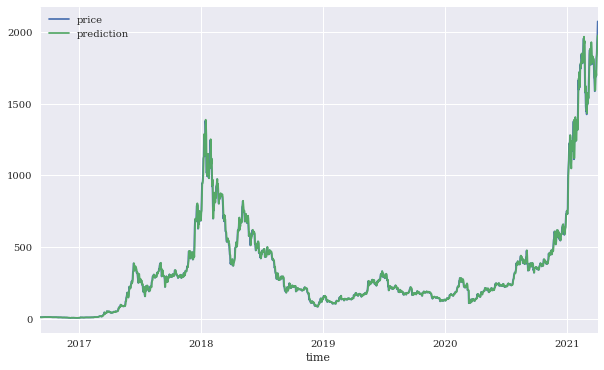

In [45]:
data[['price', 'prediction']].plot(figsize=(10, 6));

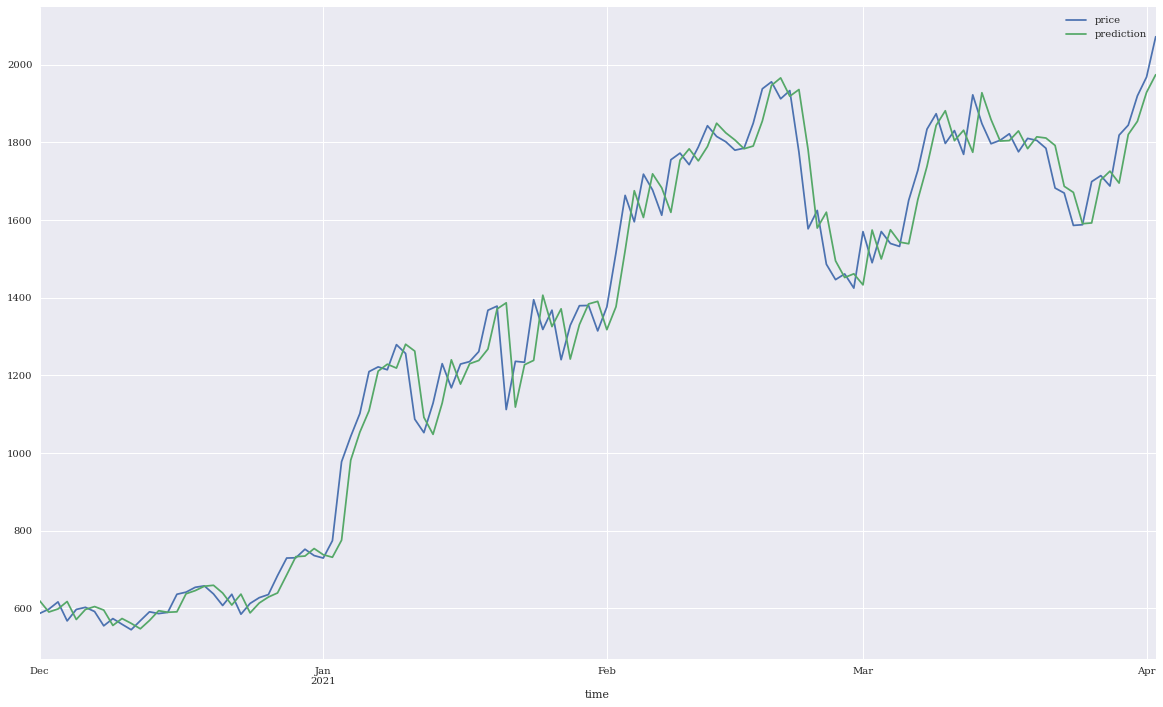

In [49]:
data[['price','prediction']].loc['2020-12-1':].plot(figsize=(20,12));

In [50]:
data['return']=np.log(data['price']/data['price'].shift(1))

In [51]:
data.dropna(inplace=True)

In [52]:
cols = []
for lag in range (1, lags + 1):
    col = f'lag_{lag}'
    data[col]=data['return'].shift(lag)
    cols.append(col)
    data.dropna(inplace=True)

In [53]:
reg = np.linalg.lstsq(data[cols],data['return'],rcond=None)[0]

In [54]:
reg

array([-0.04183322,  0.05643431,  0.02276871,  0.03600765,  0.05139364])

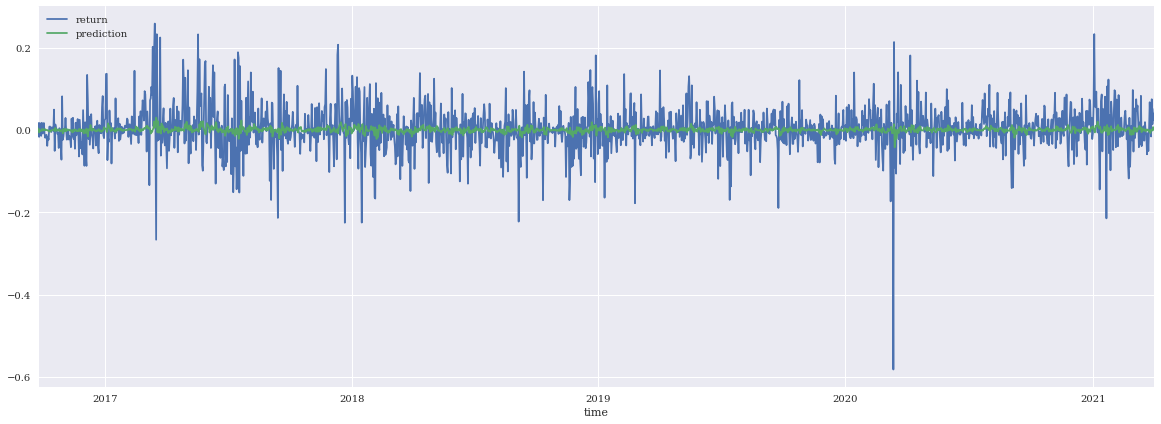

In [60]:
data['prediction'] = np.dot(data[cols], reg)
data[['return', 'prediction']].iloc[lags:].plot(figsize=(20, 7));

In [56]:
hits = np.sign(data['return']* data['prediction']).value_counts()

In [57]:
hits

 1.0    875
-1.0    779
 0.0      2
dtype: int64

In [61]:
reg = np.linalg.lstsq(data[cols],
                      np.sign(data['return']),
                     rcond=None)[0]

In [62]:
reg

array([-2.36350012,  0.69071466,  0.04175525,  0.1520425 ,  0.92199409])

In [63]:
data['prediction'] = np.sign(np.dot(data[cols],reg))

In [64]:
data['prediction'].value_counts()

 1.0    840
-1.0    816
Name: prediction, dtype: int64

In [65]:
hits = np.sign(data['return']*data['prediction']).value_counts()

In [66]:
hits

 1.0    932
-1.0    722
 0.0      2
dtype: int64

In [68]:
hits.values[0]/sum(hits)

0.5628019323671497

In [69]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
time,,,,,,,,
2016-09-20 00:00:00+00:00,14.258,0.060010,-0.027725,0.014796,0.036661,0.017758,-1.0,0.075587
2016-09-21 00:00:00+00:00,13.760,0.075587,0.060010,-0.027725,0.014796,0.036661,-1.0,-0.035552
2016-09-22 00:00:00+00:00,13.327,-0.035552,0.075587,0.060010,-0.027725,0.014796,1.0,-0.031974
2016-09-23 00:00:00+00:00,13.364,-0.031974,-0.035552,0.075587,0.060010,-0.027725,1.0,0.002772
2016-09-24 00:00:00+00:00,12.861,0.002772,-0.031974,-0.035552,0.075587,0.060010,1.0,-0.038365


In [70]:
data['strategy'] = data['prediction']*data['return']

In [74]:
data[['return', 'strategy']].sum().apply(np.exp)  

return      156.694402
strategy     48.158244
dtype: float64

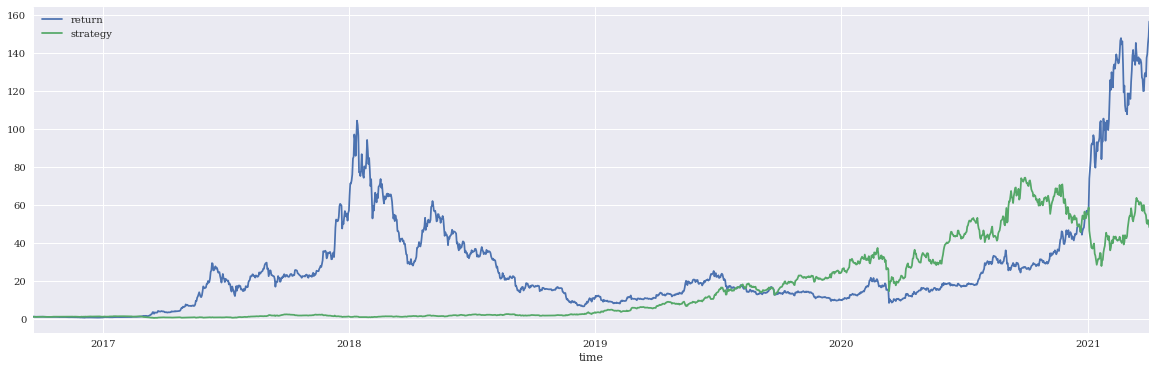

In [76]:
data[['return', 'strategy']].dropna().cumsum(
                 ).apply(np.exp).plot(figsize=(20, 6));

ModuleNotFoundError: No module named 'LRVectorBacktester'